# Library / Packages

In [1]:
# basic library
import pandas as pd
import numpy as np

# graph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# pickle and .env
from dotenv import dotenv_values
import pickle

# Format

In [2]:
def lab_round(x, pos): 
    if abs(x) >= 1e9: 
        return f'{x/1e9} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3} K'
    
    else:
        return f'{x}'
    
def val_round(x):
    if abs(x) >= 1e9:
        return f'{x/1e9:.2f} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6:.2f} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3:.2f} K'
    
    else:
        return f'{x:.2f}'

# Data Source

In [3]:
# parameter
share = {**dotenv_values('../.env.shared')} 

# read pickle
with open(share['CLEAN_DATA'], 'rb') as f:
    loaded_data = pickle.load(f)

market_df = pd.DataFrame(loaded_data)
market_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493927 entries, 2 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test_group     493927 non-null  object
 1   converted      493927 non-null  bool  
 2   total_ads      493927 non-null  int64 
 3   most_ads_day   493927 non-null  object
 4   most_ads_hour  493927 non-null  int64 
 5   week_cat       493927 non-null  object
dtypes: bool(1), int64(2), object(3)
memory usage: 23.1+ MB


In [4]:
market_df.tail()

,test_group,converted,total_ads,most_ads_day,most_ads_hour,week_cat
588096,ad,False,1,tuesday,23,weekday
588097,ad,False,1,tuesday,23,weekday
588098,ad,False,3,tuesday,23,weekday
588099,ad,False,1,tuesday,23,weekday
588100,ad,False,1,tuesday,23,weekday


# Visualization

converted      False     True 
test_group                    
ad          0.990857  0.009143
psa         0.991469  0.008531


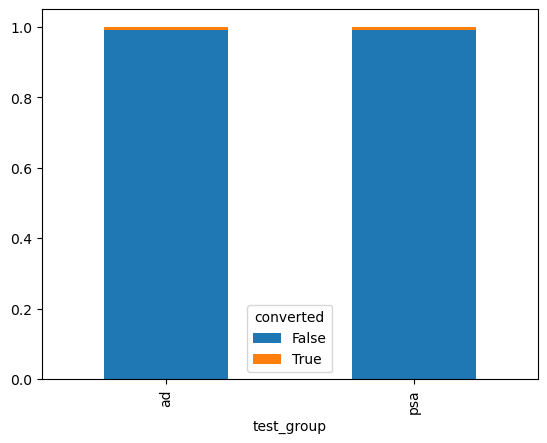

In [5]:
ct_converted_test_group = pd.crosstab(market_df['test_group'], market_df['converted'], normalize = 'index')
print(ct_converted_test_group.sort_values(by = True, ascending = False))
ct_converted_test_group.plot.bar(stacked = True);

converted        False     True 
most_ads_day                    
monday        0.988365  0.011635
tuesday       0.989466  0.010534
wednesday     0.990572  0.009428
sunday        0.990866  0.009134
friday        0.991703  0.008297
thursday      0.992315  0.007685
saturday      0.992840  0.007160


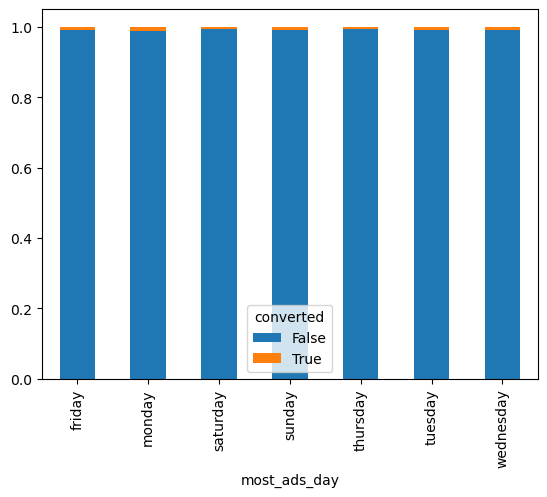

In [6]:
ct_converted_test_group = pd.crosstab(market_df['most_ads_day'], market_df['converted'], normalize = 'index')
print(ct_converted_test_group.sort_values(by = True, ascending = False))
ct_converted_test_group.plot.bar(stacked = True);

converted         False     True 
most_ads_hour                    
16             0.988191  0.011809
20             0.988739  0.011261
6              0.989071  0.010929
22             0.989532  0.010468
21             0.989584  0.010416
17             0.989639  0.010361
15             0.990079  0.009921
14             0.990166  0.009834
18             0.990446  0.009554
19             0.990527  0.009473
5              0.990775  0.009225
4              0.990958  0.009042
12             0.991580  0.008420
13             0.991595  0.008405
23             0.991650  0.008350
11             0.991705  0.008295
7              0.991787  0.008213
10             0.992430  0.007570
9              0.993281  0.006719
8              0.993923  0.006077
1              0.994974  0.005026
2              0.996051  0.003949
3              0.996097  0.003903


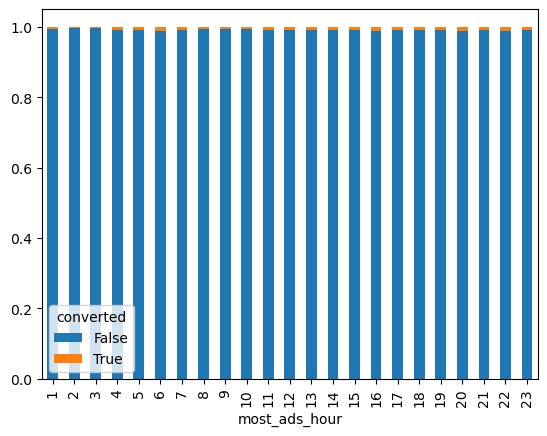

In [7]:
ct_converted_test_group = pd.crosstab(market_df['most_ads_hour'], market_df['converted'], normalize = 'index')
print(ct_converted_test_group.sort_values(by = True, ascending = False))
ct_converted_test_group.plot.bar(stacked = True);

# Statistical Stats

In [8]:
from scipy.stats import chi2_contingency

alpha = 0.05

for variable in market_df.columns: 
    if variable != 'converted': 
        # create contignecy table (cross-tabulation)
        contingency_table = pd.crosstab(market_df[variable], market_df['converted'])

        # perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # display results
        print(f'Chi-squared test for {variable} vs converted: ')
        print(f'\t Chi-squared value: {chi2}')
        print(f'\t p-value: {p}')

        if p < alpha: 
            print(f'The difference in conversion rates accross {variable} is statically significant \n')

        else: 
            print(f'There is no significant difference in conversion rates across {variable} \n')

Chi-squared test for test_group vs converted: 
	 Chi-squared value: 0.7180273684724422
	 p-value: 0.3967917312956408
There is no significant difference in conversion rates across test_group 

Chi-squared test for total_ads vs converted: 
	 Chi-squared value: 4704.205576914168
	 p-value: 0.0
The difference in conversion rates accross total_ads is statically significant 

Chi-squared test for most_ads_day vs converted: 
	 Chi-squared value: 117.26512683168592
	 p-value: 6.113083413490182e-23
The difference in conversion rates accross most_ads_day is statically significant 

Chi-squared test for most_ads_hour vs converted: 
	 Chi-squared value: 136.9329159931144
	 p-value: 1.3420255809151077e-18
The difference in conversion rates accross most_ads_hour is statically significant 

Chi-squared test for week_cat vs converted: 
	 Chi-squared value: 19.288695670359076
	 p-value: 1.1236967426821453e-05
The difference in conversion rates accross week_cat is statically significant 



In [9]:
# from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, kstest, norm

# # 1. Check assumptions
# # normality assumptions
# shapiro_stat_true, shapiro_p_val_true = shapiro(market_df[market_df['converted'] == True]['total_ads'])
# shapiro_stat_false, shapiro_p_val_false = shapiro(market_df[market_df['converted'] == False]['total_ads'])

# print(f'Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_val_true}')
# print(f'Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_val_false}')

# # equality of variance assumption
# levene_start, levene_p_value = levene(market_df[market_df['converted']]['total_ads'], market_df[~market_df['converted']]['total_ads'])
# print(f'Levene test for equality of variance: p-value = {levene_p_value}')

In [10]:
# # 2. perform suitable test
# alpha = 0.05

# if shapiro_p_val_true > alpha and shapiro_p_val_false > alpha and levene_p_value > alpha: 
#     # assumstions met - use t-test for means
#     t_stat, t_p_value = ttest_ind(market_df[market_df['converted']]['total_ads'], market_df[~market_df['converted']]['total_ads'])
#     print(f'Independent two-sample t-test: p-value = {t_p_value}')

# else: 
#     u_stat, u_p_value = mannwhitneyu(market_df[market_df['converted']]['total_ads'], market_df[~market_df['converted']]['total_ads'])
#     print(f'Mann-Whitney U-test: p-value = {u_p_value}')

In [11]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, kstest
import numpy as np

# Periksa ukuran tiap subset
n_true = len(market_df[market_df['converted'] == True])
n_false = len(market_df[market_df['converted'] == False])
sample_size = 5000

# Gunakan ukuran yang sesuai untuk sub-sampling
sample_size_true = min(sample_size, n_true)
sample_size_false = min(sample_size, n_false)

# Sub-sampling
sample_true = market_df[market_df['converted'] == True]['total_ads'].sample(sample_size_true, random_state=42, replace=False)
sample_false = market_df[market_df['converted'] == False]['total_ads'].sample(sample_size_false, random_state=42, replace=False)

# 1. Uji normalitas dengan Shapiro-Wilk (menggunakan sampel)
# ============================================================
shapiro_stat_true, shapiro_p_val_true = shapiro(sample_true)
shapiro_stat_false, shapiro_p_val_false = shapiro(sample_false)

# 1.1 Alternatif: Kolmogorov-Smirnov test (Menguji apakah distribusi data sesuai dengan distribusi tertentu)
# =============================================================================================================
ks_stat_true, ks_p_val_true = kstest(
    market_df[market_df['converted'] == True]['total_ads'], 
    cdf='norm', 
    args=(market_df[market_df['converted'] == True]['total_ads'].mean(), 
          market_df[market_df['converted'] == True]['total_ads'].std())
)
ks_stat_false, ks_p_val_false = kstest(
    market_df[market_df['converted'] == False]['total_ads'], 
    cdf='norm', 
    args=(market_df[market_df['converted'] == False]['total_ads'].mean(), 
          market_df[market_df['converted'] == False]['total_ads'].std())
)

print(f"Shapiro test for converted=True (subset): p-value = {shapiro_p_val_true}")
print(f"Shapiro test for converted=False (subset): p-value = {shapiro_p_val_false}")
print(f"Kolmogorov-Smirnov test for converted=True: p-value = {ks_p_val_true}")
print(f"Kolmogorov-Smirnov test for converted=False: p-value = {ks_p_val_false}")

Shapiro test for converted=True (subset): p-value = 2.1645760593042325e-34
Shapiro test for converted=False (subset): p-value = 2.2813751434186224e-49
Kolmogorov-Smirnov test for converted=True: p-value = 5.288070388409917e-22
Kolmogorov-Smirnov test for converted=False: p-value = 0.0
Levene test for equality of variance: p-value = 5.144418841977773e-36
Mann-Whitney U Test: p-value = 0.0


In [ ]:
# 2. Uji kesetaraan variansi (levene)
# ============================
levene_start, levene_p_val = levene(
    market_df[market_df['converted'] == True]['total_ads'],
    market_df[market_df['converted'] == False]['total_ads']
)
print(f"Levene test for equality of variance: p-value = {levene_p_val}")

# 2.1. Uji dua kelompok berbeda secara signifikan (ttest_ind)
# ==============================================
if ks_p_val_true > 0.05 and ks_p_val_false > 0.05:
    # Jika kedua kelompok normal
    if levene_p_val > 0.05:
        # Jika variansi sama, gunakan t-test biasa
        t_stat, t_p_val = ttest_ind(
            market_df[market_df['converted'] == True]['total_ads'],
            market_df[market_df['converted'] == False]['total_ads'],
            equal_var=True
        )
        print(f"T-test (equal variances): p-value = {t_p_val}")
    else:
        # Jika variansi tidak sama, gunakan Welch's t-test
        t_stat, t_p_val = ttest_ind(
            market_df[market_df['converted'] == True]['total_ads'],
            market_df[market_df['converted'] == False]['total_ads'],
            equal_var=False
        )
        print(f"Welch's T-test (unequal variances): p-value = {t_p_val}")
else:
    # 2.2. Uji median dari dua kelompok berbeda secara signifikan
    mw_stat, mw_p_val = mannwhitneyu(
        market_df[market_df['converted'] == True]['total_ads'],
        market_df[market_df['converted'] == False]['total_ads'],
        alternative='two-sided'
    )
    print(f"Mann-Whitney U Test: p-value = {mw_p_val}")
